# Heart Stroke Prediction

## Importing libraries

In [25]:
# 📘 Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🤖 Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

In [26]:
# 📂 Load Dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [27]:
# 🔍 Data Preview
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


## Data Preprocessing

In [28]:
# 🧹 Drop Irrelevant Column
df.drop('id', axis=1, inplace=True)

In [29]:
# 📊 Summary Statistics
print(df.describe())
print(df.info())

               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4909.000000  5110.000000  
mean     28.893237     0.048728  
std       7.854067     0.215320  
min      10.300000     0.000000  
25%      23.500000     0.000000  
50%      28.100000     0.000000  
75%      33.100000     0.000000  
max      97.600000     1.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries,

In [30]:
# 🧼 Handling Missing Data (Updated,It'll not show future warning)
df.loc[df['bmi'].isnull(), 'bmi'] = df['bmi'].mode()[0]

#### Replacing the values in columns with numerical values

- Residence Type: Urban = 1, Rural = 0
- Smoking Status: formerly smoked = 1, never smoked = 2, smokes = 3, Unknown = 0
-   Ever_Maried : Yes = 1, No = 0
- Gender : Male = 1, Female = 0, Other = 2
- Work Type : Private = 0, Self-employed = 1, children = 2, Govt_job = 3, Never_worked = 4

In [31]:
# 📌 Encoding Categorical Variables (Manual Mapping) - Updated
df = df.replace({'gender': {'Male': 1, 'Female': 0, 'Other': 2}})
df = df.replace({'ever_married': {'Yes': 1, 'No': 0}})
df = df.replace({'Residence_type': {'Urban': 1, 'Rural': 0}})
df = df.replace({'work_type': {'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 4}})
df = df.replace({'smoking_status': {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}})

#### Check values and their count in the columns

In [32]:
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['gender'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())

ever_married
1    3353
0    1757
Name: count, dtype: int64
work_type
0    2925
1     819
2     687
3     657
4      22
Name: count, dtype: int64
gender
0    2994
1    2115
2       1
Name: count, dtype: int64
Residence_type
1    2596
0    2514
Name: count, dtype: int64
smoking_status
1    1892
3    1544
0     885
2     789
Name: count, dtype: int64


## Exploratory Data Analysis

#### Find correlation between the variables

<Axes: >

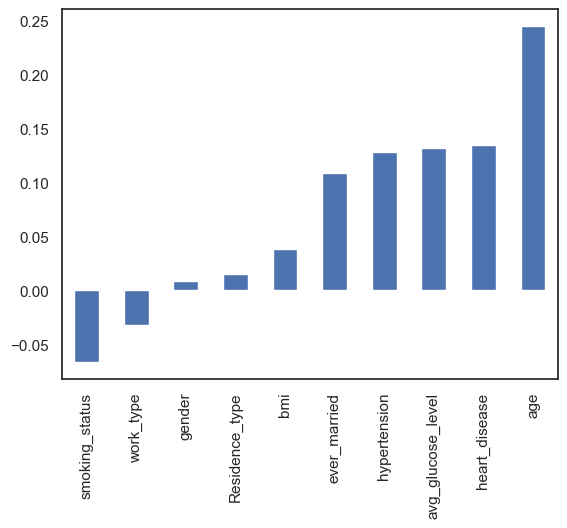

In [33]:
df.corr()['stroke'][:-1].sort_values().plot(kind='bar')

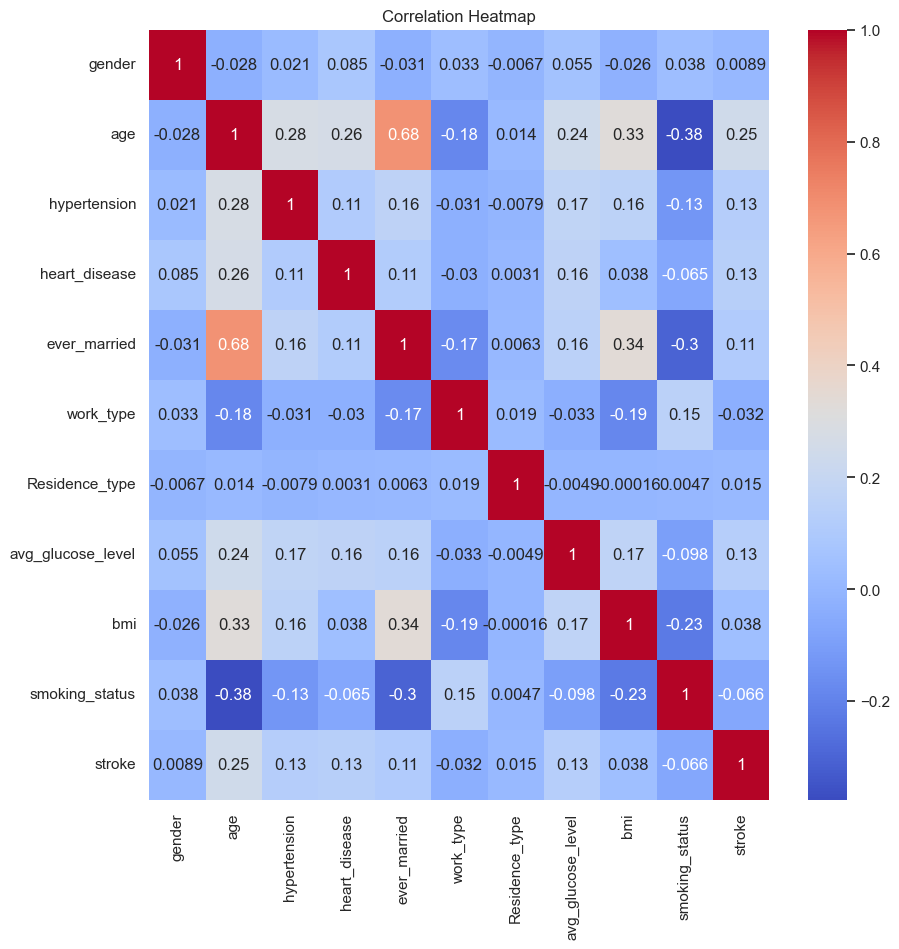

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Visulaizing the data

<Axes: xlabel='gender', ylabel='count'>

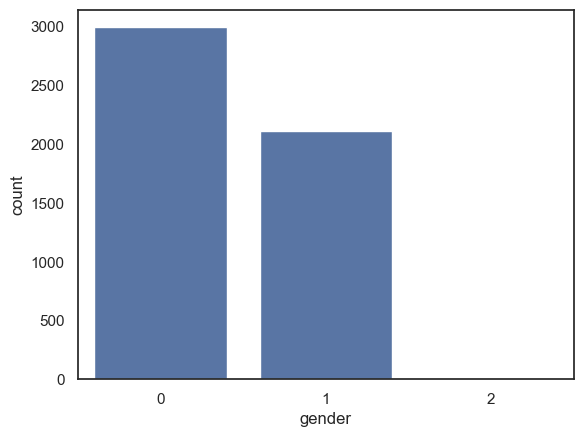

In [35]:
sns.countplot(x = 'gender', data = df)

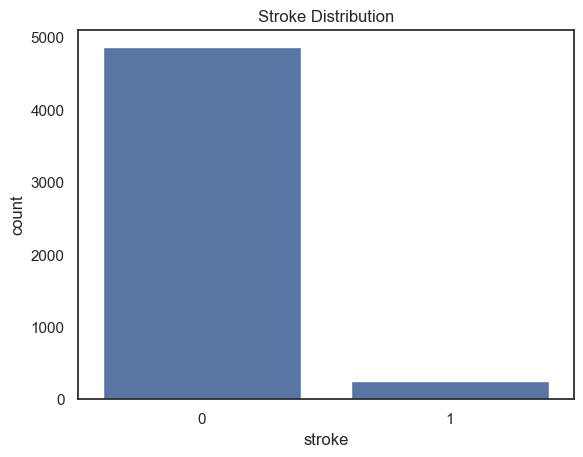

In [36]:
# Distribution of Stroke Cases
sns.countplot(x='stroke', data=df)
plt.title("Stroke Distribution")
plt.show()

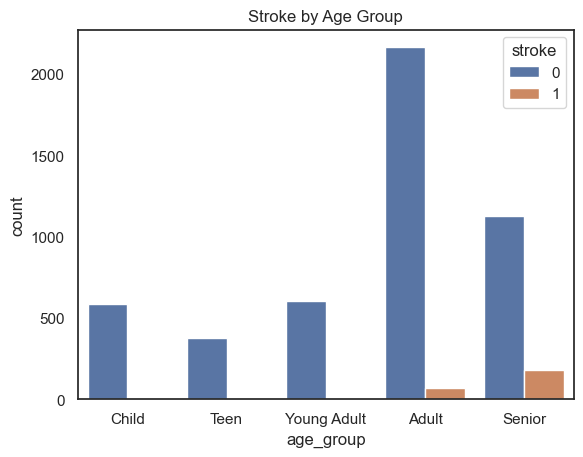

In [37]:
# Age Grouping (Optional Visualization)
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 19, 30, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.countplot(x='age_group', hue='stroke', data=df)
plt.title("Stroke by Age Group")
plt.show()

<Axes: xlabel='Residence_type', ylabel='count'>

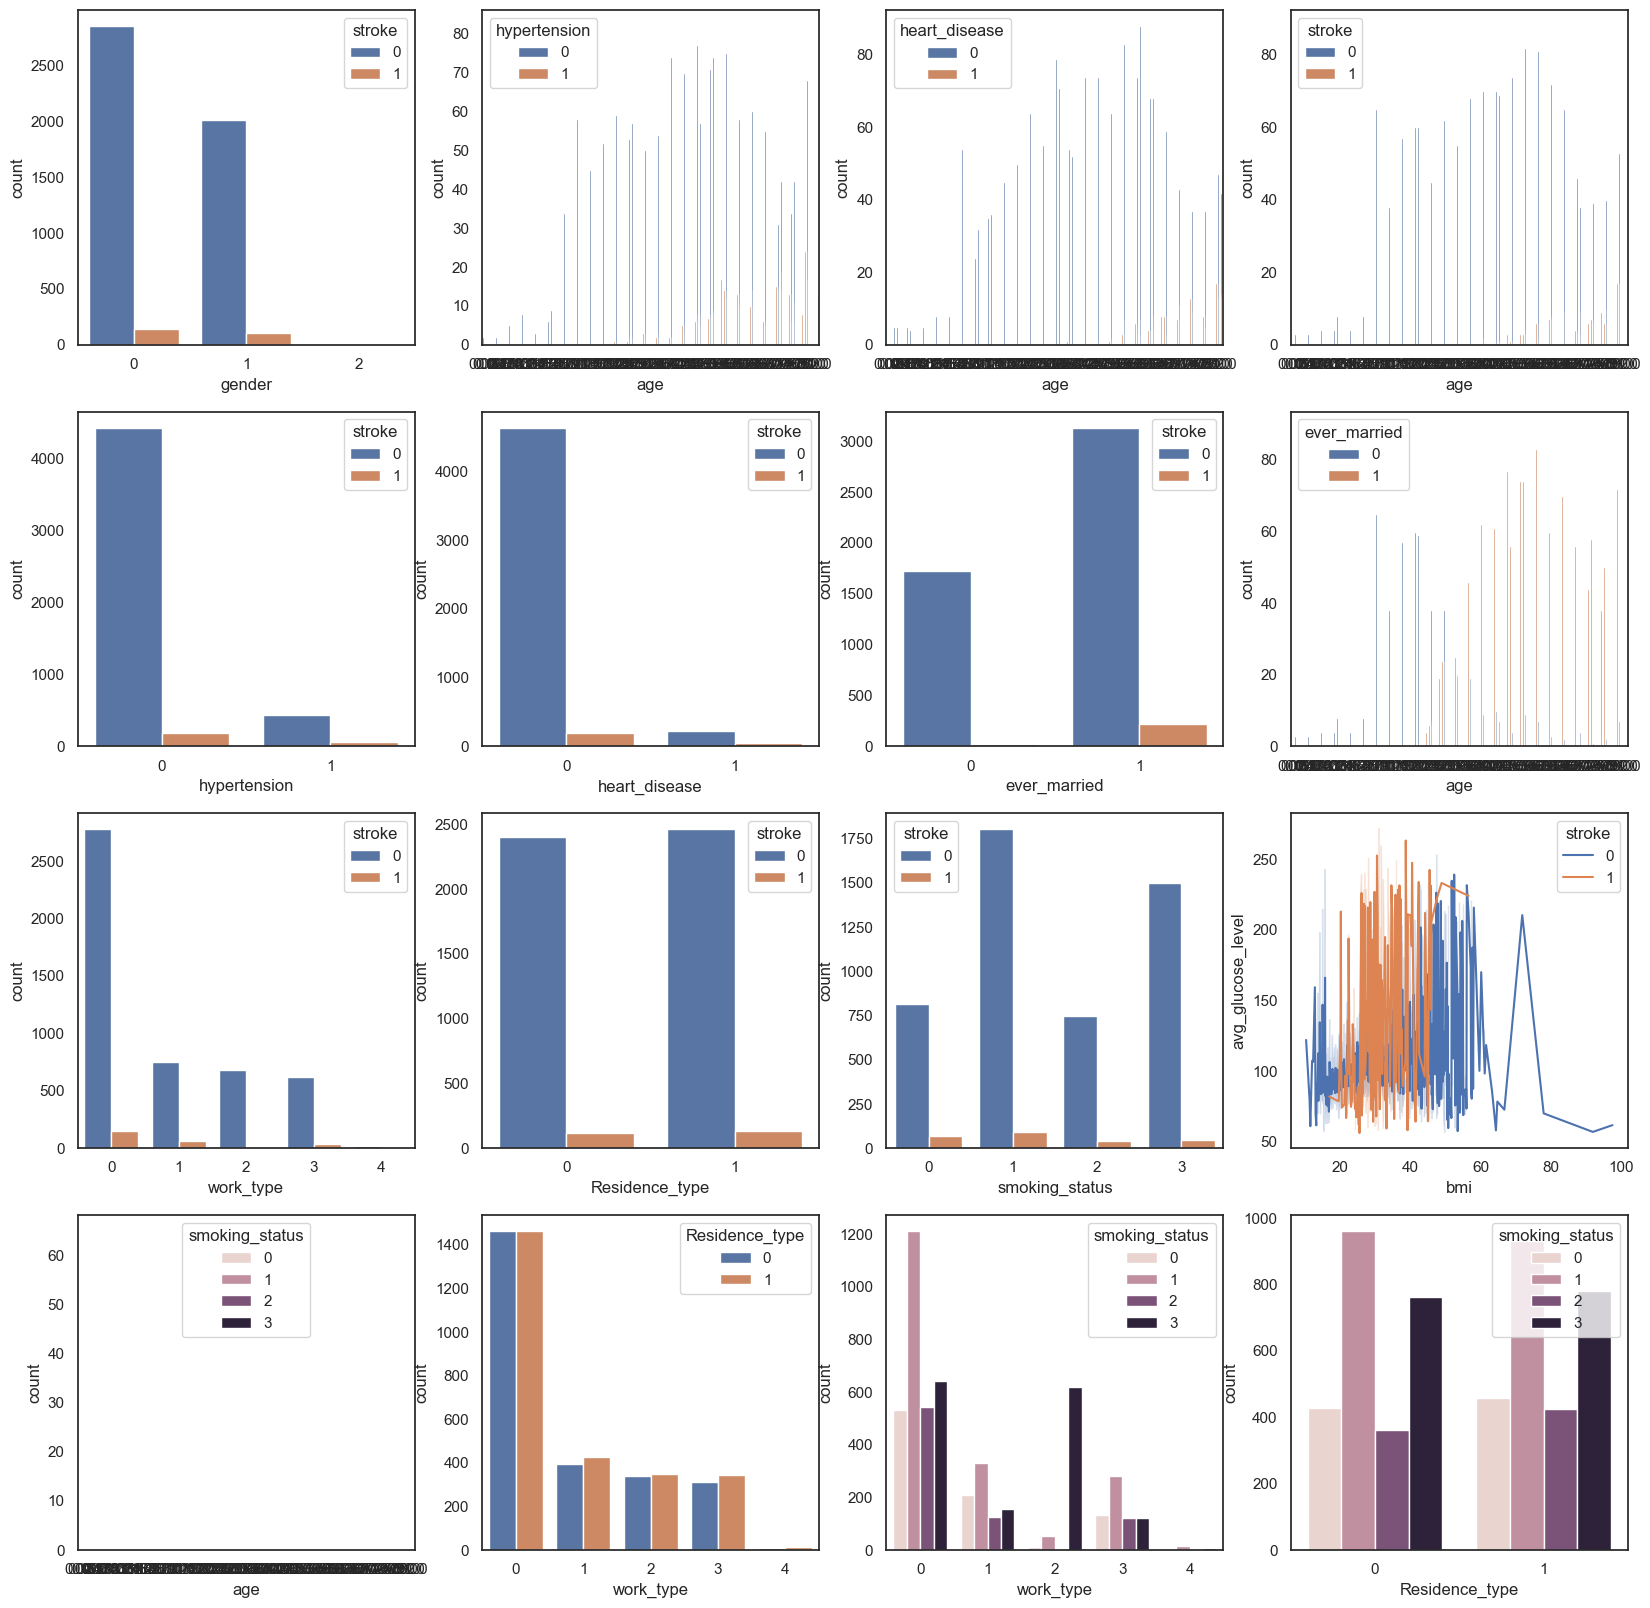

In [38]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = df,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = df,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = df,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = df,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = df,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])

In [39]:
# 🧠 Feature & Target Split
X = df.drop(['stroke', 'age_group'], axis=1)
y = df['stroke']

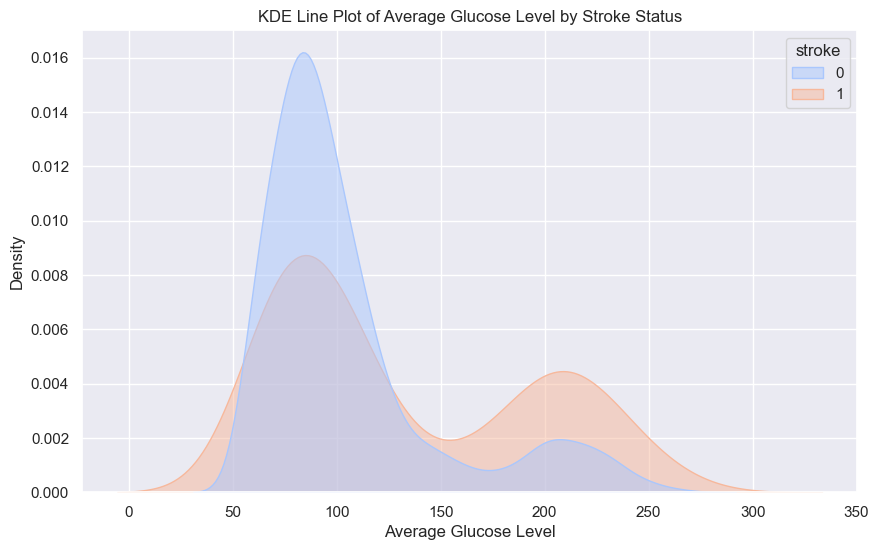

In [40]:
sns.set(style="darkgrid")
# KDE Plot
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', fill=True, common_norm=False, palette='coolwarm', alpha=0.5)
plt.title('KDE Line Plot of Average Glucose Level by Stroke Status')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.show()

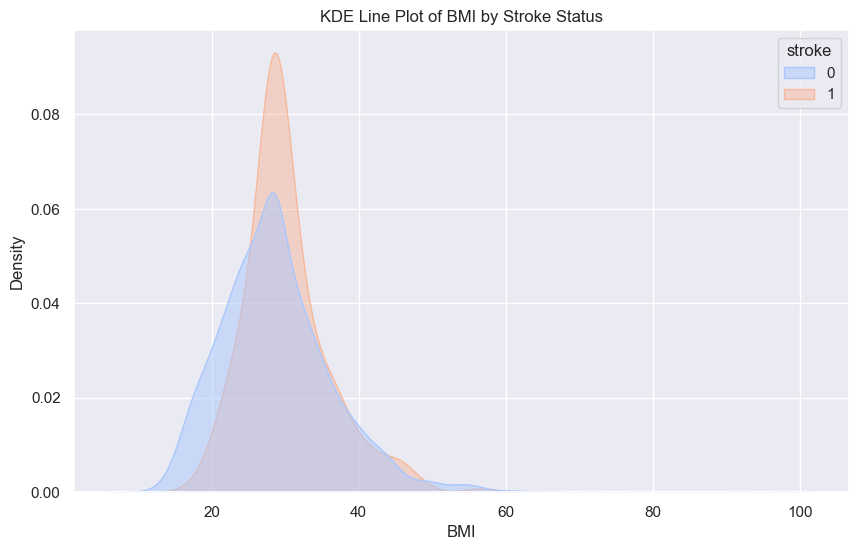

In [41]:
# Set the style for better aesthetics
sns.set(style="darkgrid")
# KDE Plot for BMI
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='bmi', hue='stroke', fill=True, common_norm=False, palette='coolwarm', alpha=0.5)
plt.title('KDE Line Plot of BMI by Stroke Status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

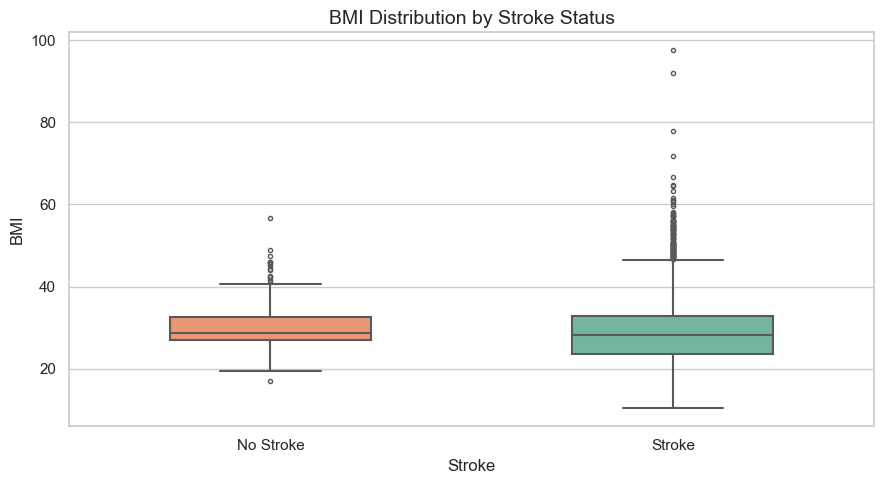

In [42]:
# Set aesthetic style
sns.set(style="whitegrid")
# Convert 'stroke' to string so palette works correctly
df['stroke'] = df['stroke'].astype(str)
# Define palette for string keys this time!
custom_palette = {'0': '#66c2a5', '1': '#fc8d62'}
# Draw boxplot
plt.figure(figsize=(9, 5))
sns.boxplot(x='stroke',y='bmi',data=df,hue='stroke',palette=custom_palette,width=0.5,fliersize=3,linewidth=1.5,legend=False)
# Title and labels
plt.title('BMI Distribution by Stroke Status', fontsize=14)
plt.xlabel('Stroke', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.tight_layout()
plt.show()


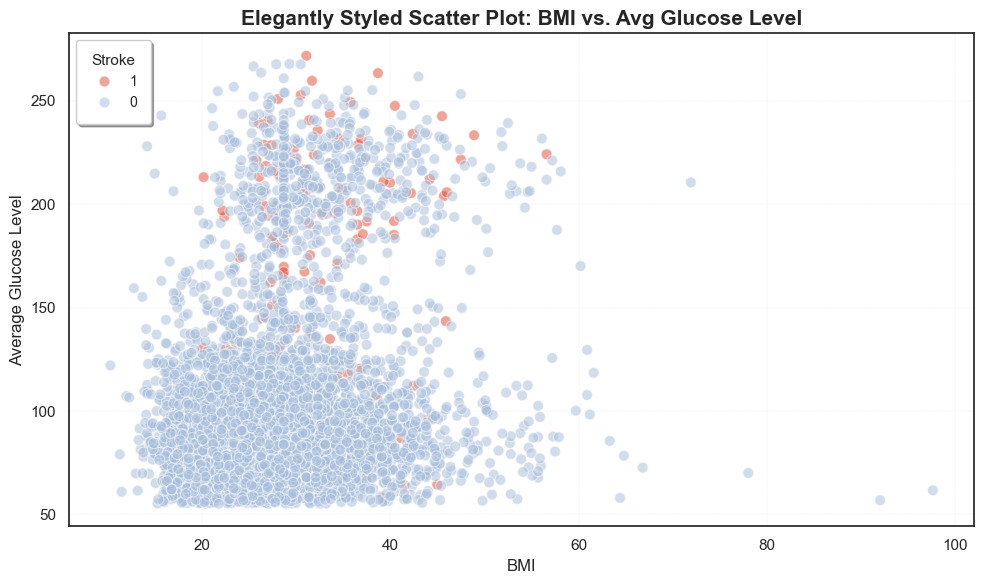

In [43]:
# Set a minimal aesthetic
sns.set(style="white", context="notebook")
# Convert stroke to string for better hue separation
df['stroke'] = df['stroke'].astype(str)
# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df,x='bmi',y='avg_glucose_level',hue='stroke',palette={'0': '#a6bddb', '1': '#e34a33'}, alpha=0.5,edgecolor='white',linewidth=0.8,s=60 )
# Titles and axis labels
plt.title('Elegantly Styled Scatter Plot: BMI vs. Avg Glucose Level', fontsize=15, fontweight='bold')
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Average Glucose Level', fontsize=12)
# Legend adjustments
plt.legend(title='Stroke', title_fontsize=11, fontsize=10, loc='upper left', borderpad=1, frameon=True, shadow=True)
# Add grid subtly
plt.grid(visible=True, linestyle='--', linewidth=0.3, alpha=0.4)
# Clean layout
plt.tight_layout()
plt.show()

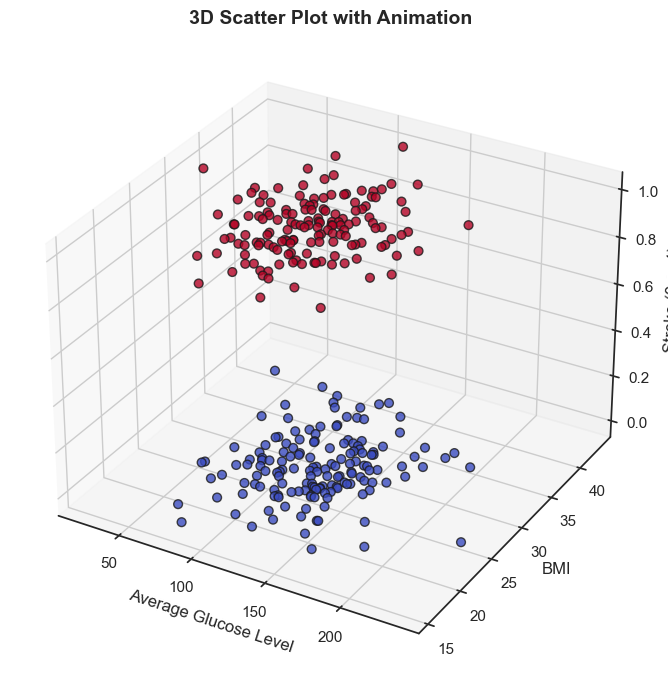

In [44]:
# Sample data simulating your dataset
np.random.seed(42)
df = pd.DataFrame({
    'avg_glucose_level': np.random.normal(120, 30, 300),
    'bmi': np.random.normal(28, 5, 300),
    'stroke': np.random.choice([0, 1], size=300)
})
# Extract data
x = df['avg_glucose_level']
y = df['bmi']
z = df['stroke']
# Create figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Initial scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='coolwarm', s=40, alpha=0.8, edgecolors='k')
# Labels and title
ax.set_xlabel('Average Glucose Level', fontsize=12)
ax.set_ylabel('BMI', fontsize=12)
ax.set_zlabel('Stroke (0 or 1)', fontsize=12)
ax.set_title('3D Scatter Plot with Animation', fontsize=14, fontweight='bold')
# Animation function
def rotate(angle):
    ax.view_init(elev=20, azim=angle)
# Create animation
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, 2), interval=100)

plt.tight_layout()
plt.show()

## Train Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('stroke', axis=1), df['stroke'], test_size=0.2, random_state=42)


## Model Training

### Logistic Regression

In [46]:
# 🔍 Logistic Regression Model (Simple Classifier)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [47]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.4666666666666667

In [48]:
#testing the model
model_pred = model.predict(X_test)
accuracy_score(y_test, model_pred)

0.4666666666666667

In [49]:
# 🧮 Predictions
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.4666666666666667


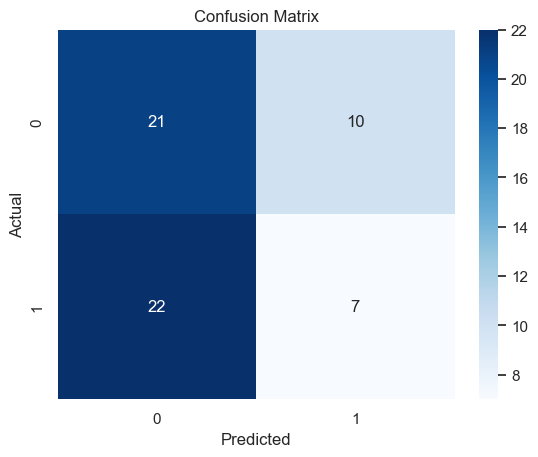

In [50]:
#🔎 Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
# Define features and target
X = df.drop(columns=['stroke'])
y = df['stroke']
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Predict on test set
y_pred = model.predict(X_test)  
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.71      0.64        31
           1       0.59      0.45      0.51        29

    accuracy                           0.58        60
   macro avg       0.58      0.58      0.57        60
weighted avg       0.58      0.58      0.58        60



In [52]:
y_prob = model.predict_proba(X_test)[:, 1]
rmse = np.sqrt(mean_squared_error(y_test, y_prob))
print("RMSE (Root Mean Squared Error):", rmse)

RMSE (Root Mean Squared Error): 0.4933617613501258


In [53]:
# Predicted probabilities for class 1
y_prob = model.predict_proba(X_test)[:, 1]
# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_prob)
print("MSE (Mean Squared Error):", mse)

MSE (Mean Squared Error): 0.2434058275624985


In [54]:
# Get predicted probabilities for the positive class (1)
y_prob = model.predict_proba(X_test)[:, 1]
# Calculate R² score using true labels and predicted probabilities
r2 = r2_score(y_test, y_prob)
print("R² Score:", r2)

R² Score: 0.025293682730818


Confusion Matrix:
 [[22  9]
 [16 13]]


<Figure size 600x500 with 0 Axes>

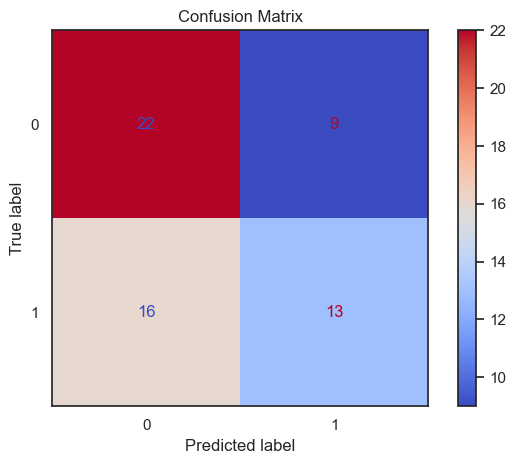

In [55]:
# Predict using the trained model
y_pred = model.predict(X_test)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Print the matrix as output
print("Confusion Matrix:\n", cm)
# Optional: Display the matrix as a plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
plt.figure(figsize=(6, 5))
disp.plot(cmap='coolwarm', values_format='d')  # Show integer values
plt.title("Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

## Model Evaluation

### Logistic Regression

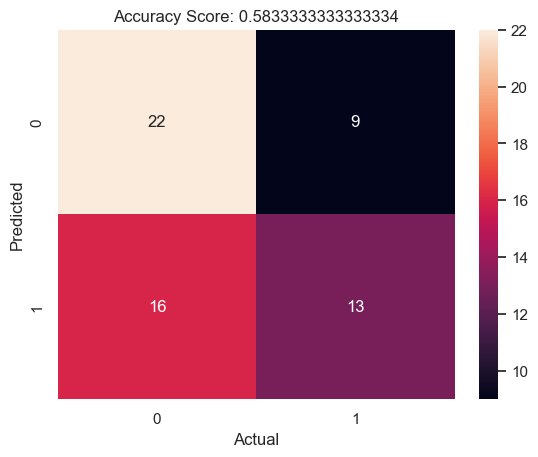

In [56]:
lr_pred = model.predict(X_test)
sns.heatmap(metrics.confusion_matrix(y_test, lr_pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(y_test, lr_pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [57]:
print('Logistic Regression Model Accuracy Score:',accuracy_score(y_test, lr_pred))
print('Logistic Regression Model F1 score: ',metrics.f1_score(y_test, lr_pred))
print('Logistic Regression Model Mean Absolute Error: ',metrics.mean_absolute_error(y_test, lr_pred))
print('Logistic Regression Model Mean Squared Error: ',metrics.mean_squared_error(y_test, lr_pred))
print('Logistic Regression Model R2 Score: ',metrics.r2_score(y_test, lr_pred))

Logistic Regression Model Accuracy Score: 0.5833333333333334
Logistic Regression Model F1 score:  0.5098039215686274
Logistic Regression Model Mean Absolute Error:  0.4166666666666667
Logistic Regression Model Mean Squared Error:  0.4166666666666667
Logistic Regression Model R2 Score:  -0.6685205784204673


## Conclusion

The model accuracies of Logistic Regression is 58.33 %. So, we can use this model to predict the heart stroke.

According to the graphs age v/s hypertension, heart disease showing chances of stroke, the number of person having a stroke shows dependece upon heart disease and hypertension. But when we plot the graph of heart disease and hypertension against the stroke, the persons with lower chances of hypertension and heart disease has increased chances of stroke. This is a peculiar thing and needs to be investigated further. In addition to that non smokers have higher chances of stroke than smokers. This is also a peculiar thing and needs to be investigated further. However person having BMI between 20 to 50 have higher chances of stroke.

Last but not least other features such as martial status, residence type as well as work type are showing effect on the chances of stroke.